In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import random

args = {
    "node_size": 500,
    "node_color": "salmon",
    "edge_color": "black",
    "node_shape": "o",
    "linewidths": 1,
    "edgecolors": "black",
    "font_color": "black",
    "with_labels": False,
}

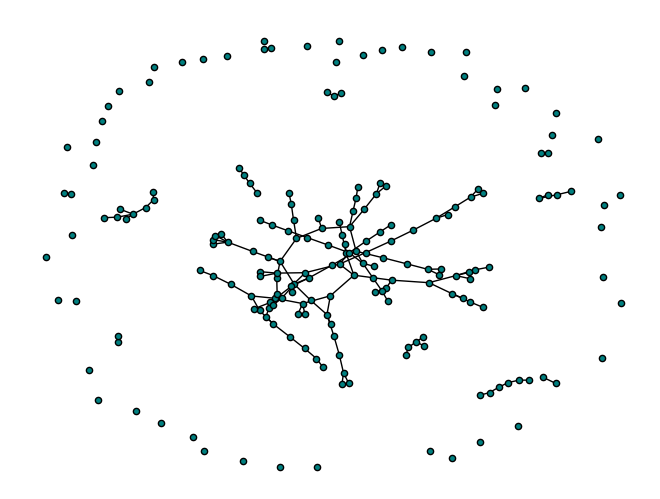

In [4]:
n = 200
k = 1.5

p = k / (n - 1)

G = nx.erdos_renyi_graph(n=n, p=p)

args['node_color'] = 'teal'
args["with_labels"] = False
args["node_size"] = 20
nx.draw(G, **args)

Original graph: 200 nodes, 144 edges
Giant component: 110 nodes, 115 edges
Percentage of nodes in GCC: 55.00%


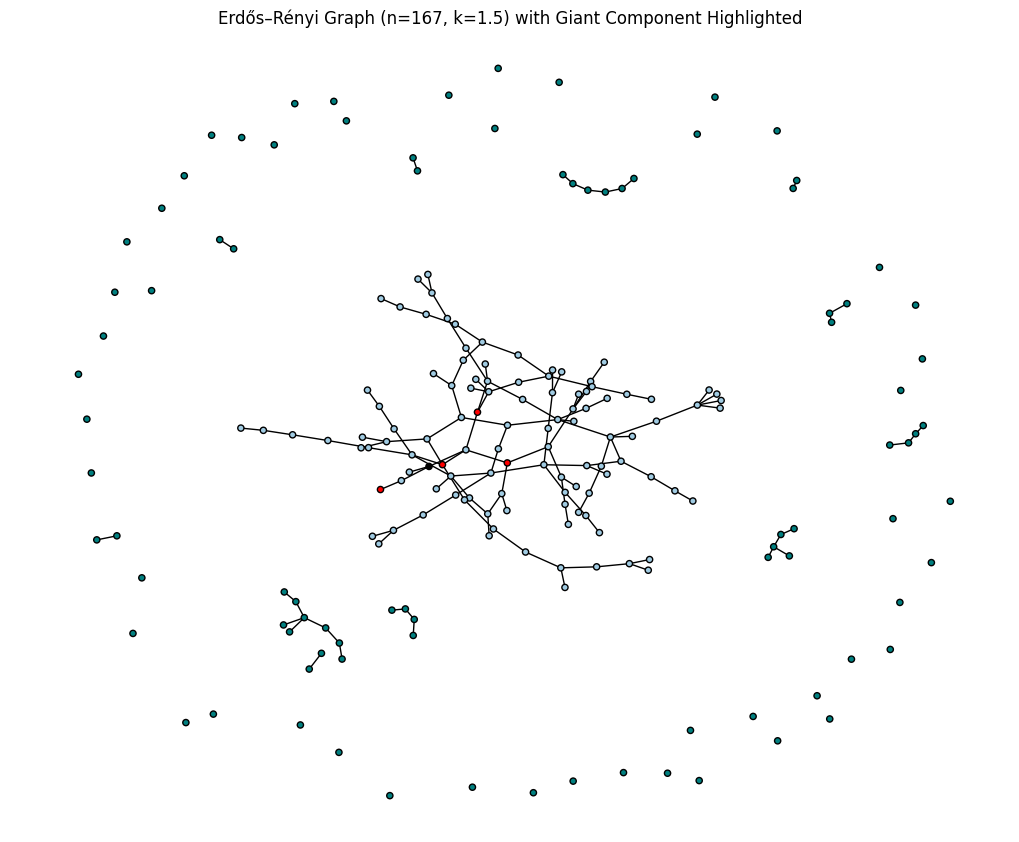

In [5]:
components = sorted(nx.connected_components(G), key=len, reverse=True)
gcc = components[0] 

random_node = random.choice(list(gcc))
node_colors = ['#A0CBE2' if node in gcc else 'teal' for node in G.nodes()]
node_colors[random_node] = '#000000'

gcc_graph = G.subgraph(gcc)
distances = nx.single_source_shortest_path_length(gcc_graph, random_node)

nodes_two = [node for node in distances if distances[node] == 2]

for n in nodes_two:
    node_colors[n] = '#ff0000'

plt.figure(figsize=(10, 8))
nx.draw(
    G, 
    node_color=node_colors,
    edge_color="black",
    node_size=20,
    node_shape="o",
    linewidths=1,
    edgecolors="black",
    with_labels=False)

plt.title(f"Erdős–Rényi Graph (n={n}, k={k}) with Giant Component Highlighted")

print(f"Original graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")
print(f"Giant component: {gcc_graph.number_of_nodes()} nodes, {gcc_graph.number_of_edges()} edges")
print(f"Percentage of nodes in GCC: {100 * gcc_graph.number_of_nodes() / G.number_of_nodes():.2f}%")